# Final Project - Fundamentals of Machine Learning

## 1. Introduction

Unfortunately, more than 25% of hospital patients die due to heart failure and the correct diagnosis in the early stages is crucial to determine each patient’s perspective of survival. It is estimated that more 17 million people globally die every year and the main factor is myocardial infarctions and heart failures. 

The hypothesis to be tested in this work is whether the levels of creatinine phosphokinase, ejection fraction, diabetes, serum creatinine, serum sodium, smoking, high blood pressure and anaemia are associated with higher likelihood of heart failure, a kind of cardiovascular problem.

The dataset selected is *Heart Failure Clinical Dataset* from 2020 with 299 instances (https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records), containing 13 features showing information about body, clinical and lifestyle. 

A brief description of each one:

**age**: age of the patient in years


**anaemia**: decrease of red blood cells or hemoglobin (0: False | 1: True)


**creatinine phosphokinase**: level of the CPK enzyme in the blood in mcg/L


**diabetes**: if the patient has diabetes (0: False | 1: True)


**ejection fraction**: percentage of blood leaving the heart at each contraction (%)


**high blood pressure**: if the patient has hypertension (0: False | 1: True)


**platelets**: platelets in the blood in kiloplatelets/mL


**serum creatinine**: level of creatinine in the blood in mg/dL


**serum sodium**: level of sodium in the blood in mEq/L


**sex**: woman or man (0: woman | 1: man)


**smoking**: if the patient smokes (0: False | 1: True)


**time**: follow-up period in days


**death event**: if the patient died during the follow-up period (0: survived | 1: dead)

## 2. Importing the Dataset

In [1]:
# load libraries
import pandas as pd
import numpy as np

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# reading the dataset from the file
df_hf = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df_hf.shape

(299, 13)

In [3]:
df_hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# check if there is null value
df_hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
# show the type of each attribute
df_hf.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## 3. Exploratory Data Analysis

In [6]:
# load libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

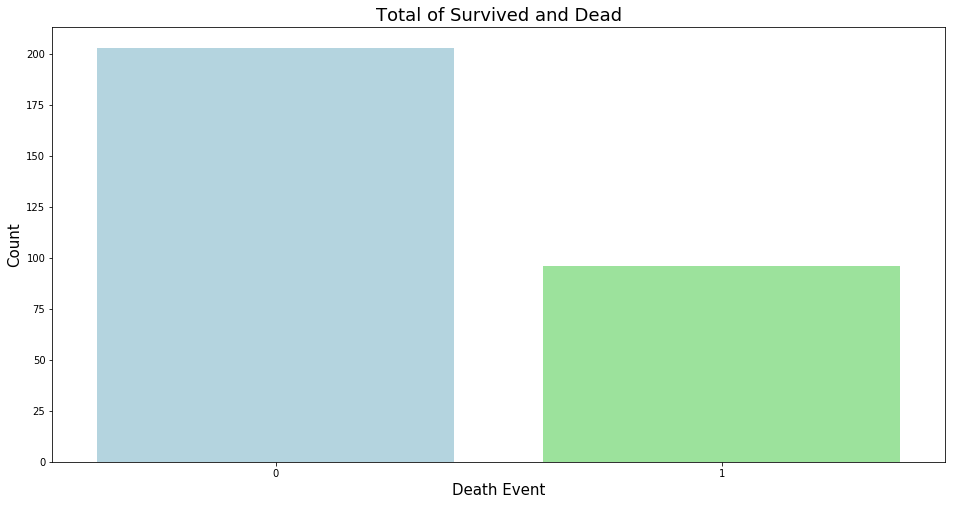

Survived: 67.9%
Dead    : 32.1%


In [7]:
# Total of Survived and Dead Patients
plt.figure(figsize=(16,8))
plt.title('Total of Survived and Dead', fontsize=18)
ax = sns.countplot(x='DEATH_EVENT', data=df_hf, palette=['lightblue', 'lightgreen'], 
                   alpha=1.0, edgecolor=('white'), linewidth=0)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Death Event', fontsize=15)
ax.grid(b=True, which='major', color='grey', linewidth=0.0)
plt.show()

target_Survived = len(df_hf[df_hf.DEATH_EVENT == 0])
target_Dead = len(df_hf[df_hf.DEATH_EVENT == 1])

print("Survived: {:.1f}%".format((target_Survived / (len(df_hf.DEATH_EVENT))*100)))
print("Dead    : {:.1f}%".format((target_Dead / (len(df_hf.DEATH_EVENT))*100)))

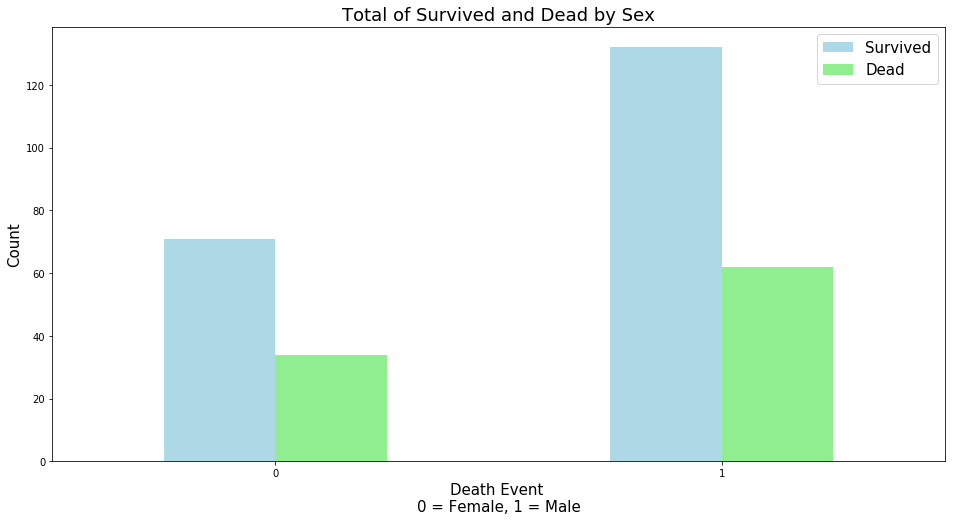

In [8]:
# total of survived and dead patients by sex
pd.crosstab(df_hf.sex, df_hf.DEATH_EVENT).plot(kind="bar", figsize=(16,8), color=['lightblue', 'lightgreen'])
plt.title('Total of Survived and Dead by Sex', fontsize=18)
plt.xlabel('Death Event \n0 = Female, 1 = Male', fontsize=15)
plt.xticks(rotation=0)
plt.legend(["Survived", "Dead"], fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Text(0, 0.5, 'Count')

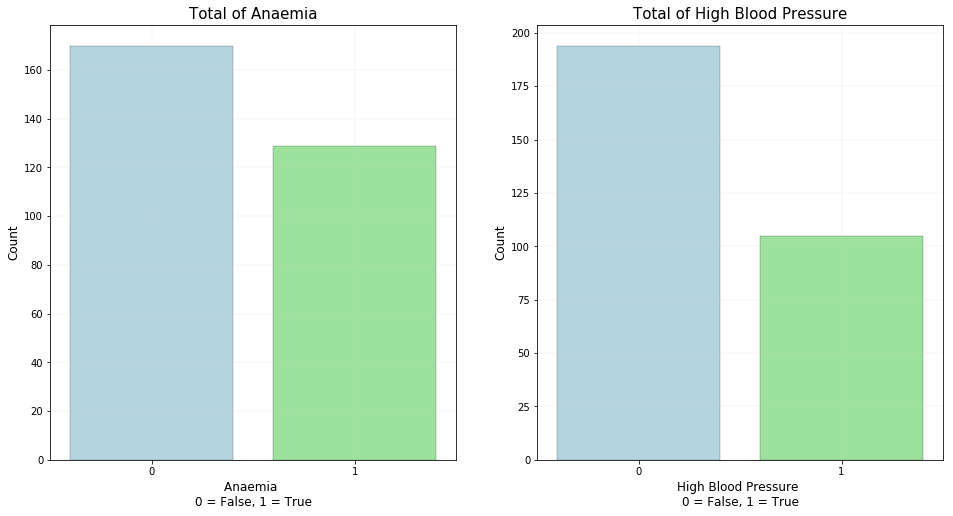

In [9]:
# total of patients with/without anaemia and high blood pressure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1 = sns.countplot(x = df_hf.anaemia, data = df_hf, ax=ax1,
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax1.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax1.set_title('Total of Anaemia', fontsize=15)
ax1.set_xlabel('Anaemia \n0 = False, 1 = True', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

ax2 = sns.countplot(x = df_hf['high_blood_pressure'], data = df_hf, ax=ax2,
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax2.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax2.set_title('Total of High Blood Pressure', fontsize=15)
ax2.set_xlabel('High Blood Pressure \n0 = False, 1 = True', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

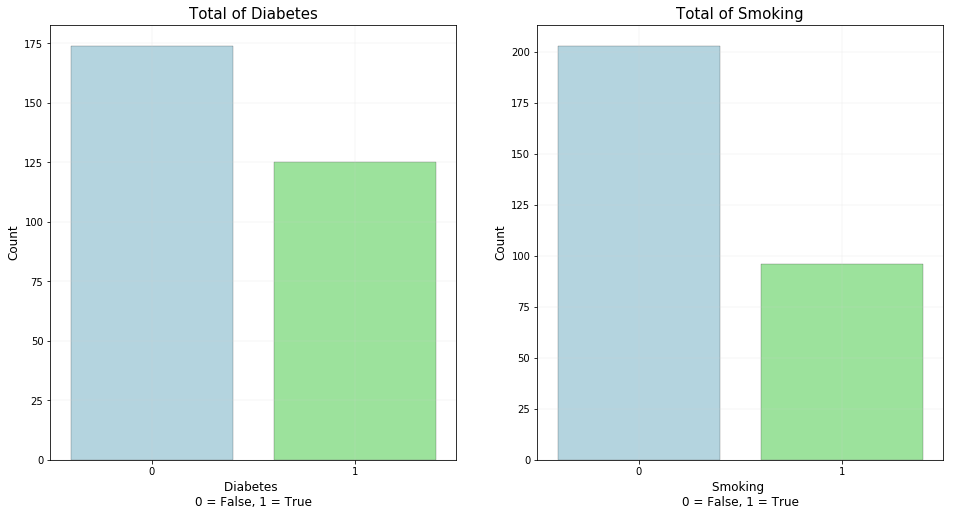

In [10]:
# total of patients with/without diabetes and smoking/non-smoking
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1 = sns.countplot(x = df_hf.diabetes, data = df_hf, ax=ax1,
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax1.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax1.set_title('Total of Diabetes', fontsize=15)
ax1.set_xlabel('Diabetes \n0 = False, 1 = True', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

ax2 = sns.countplot(x = df_hf.smoking, data = df_hf, ax=ax2,
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax2.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax2.set_title('Total of Smoking', fontsize=15)
ax2.set_xlabel('Smoking \n0 = False, 1 = True', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

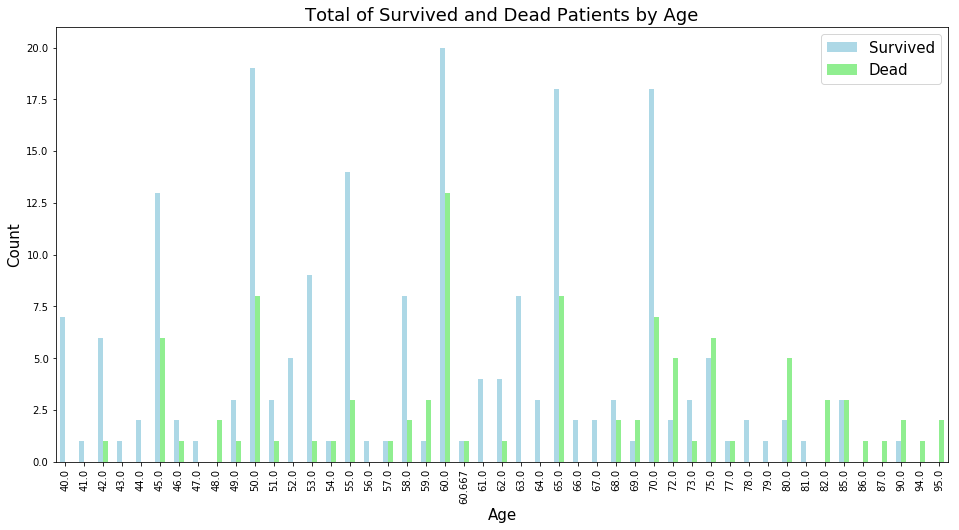

In [11]:
# distribution of survived/dead patients by age
pd.crosstab(df_hf.age,df_hf.DEATH_EVENT).plot(kind="bar", figsize=(16,8), color=['lightblue', 'lightgreen'])
plt.title('Total of Survived and Dead Patients by Age', fontsize = 18)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(['Survived', 'Dead'], fontsize = 15)
plt.show()

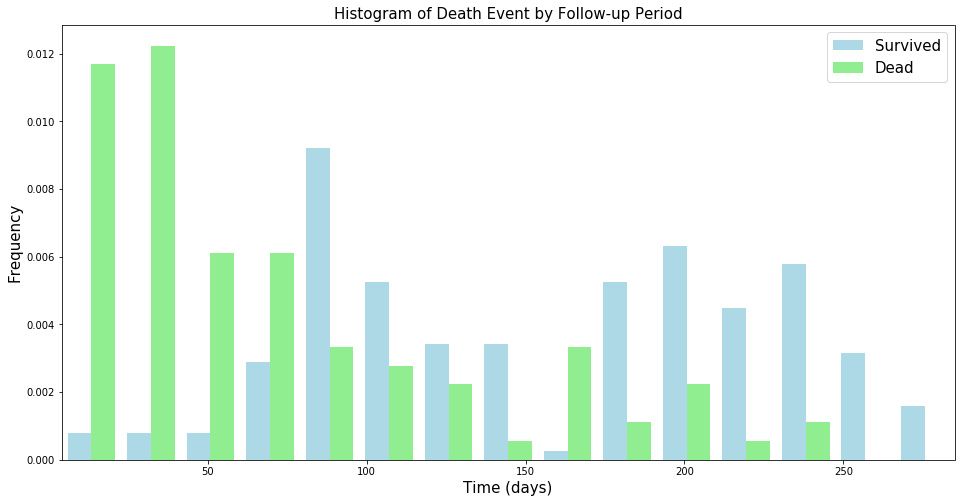

In [12]:
plt.figure(figsize=(16, 8))
plt.hist(np.array([list(df_hf[df_hf.DEATH_EVENT == 0]['time']),list(df_hf[df_hf.DEATH_EVENT == 1]['time'])], dtype=object),
         color = ['lightblue', 'lightgreen'], 
         label= ['Survived', 'Dead'], 
         bins = 15, 
         density=True)
plt.title('Histogram of Death Event by Follow-up Period', fontsize = 15)
plt.xlim(4, 285)
plt.xlabel('Time (days)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

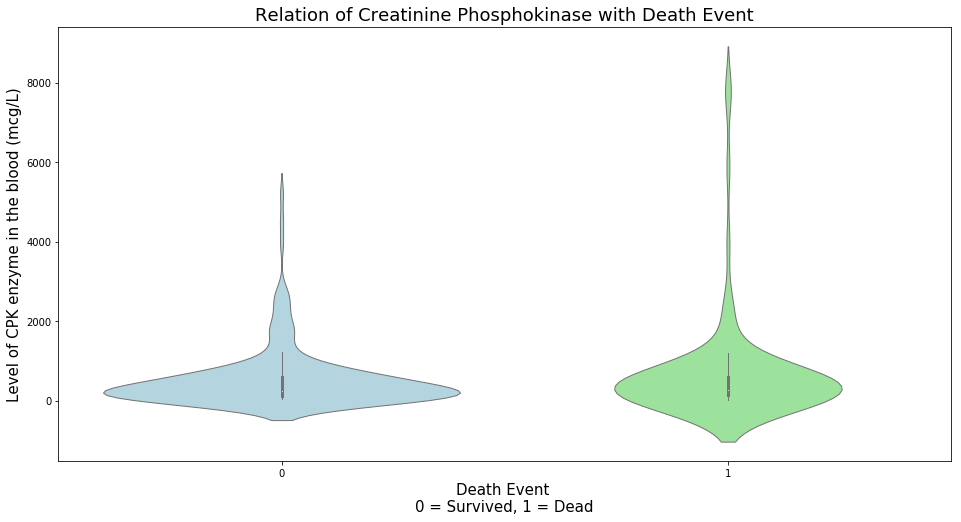

In [13]:
# full distribution of the creatinine phosphokinase by death event
plt.figure(figsize=(16,8))
sns.violinplot(df_hf['DEATH_EVENT'], df_hf['creatinine_phosphokinase'], palette = ['lightblue', 'lightgreen'], 
           linewidth=1.0)
plt.title('Relation of Creatinine Phosphokinase with Death Event', fontsize = 18)
plt.xlabel('Death Event \n0 = Survived, 1 = Dead', fontsize = 15)
plt.ylabel('Level of CPK enzyme in the blood (mcg/L)', fontsize = 15)
plt.show()

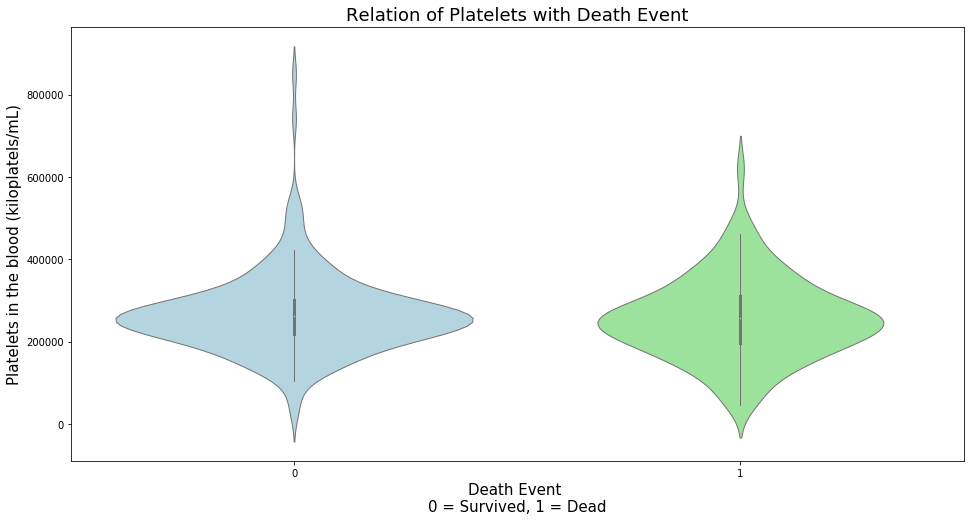

In [14]:
# full distribution of the platelets by death event
plt.figure(figsize=(16,8))
sns.violinplot(df_hf['DEATH_EVENT'], df_hf['platelets'], palette = ['lightblue', 'lightgreen'], linewidth=1.0)
plt.title('Relation of Platelets with Death Event', fontsize = 18)
plt.xlabel('Death Event \n0 = Survived, 1 = Dead', fontsize = 15)
plt.ylabel('Platelets in the blood (kiloplatels/mL)', fontsize = 15)
plt.show()

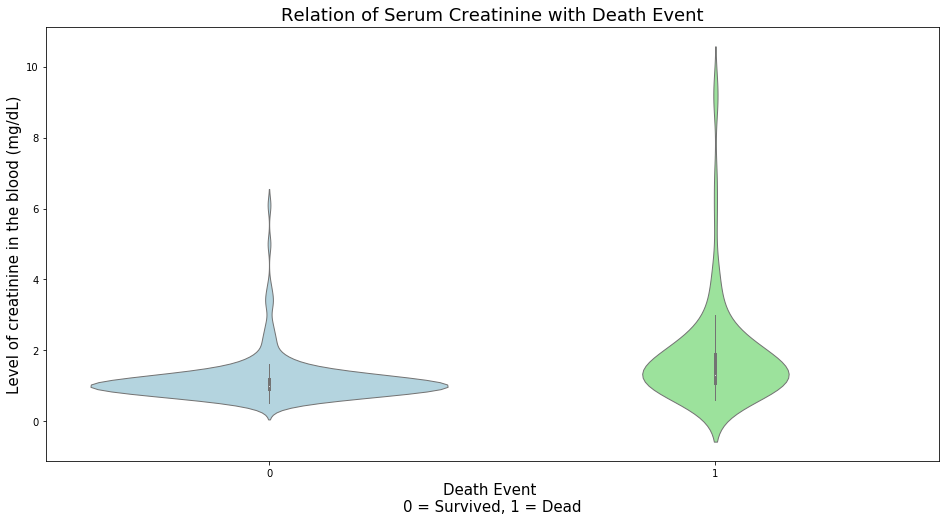

In [15]:
# full distribution of the serum creatinine by death event
plt.figure(figsize=(16,8))
sns.violinplot(df_hf['DEATH_EVENT'], df_hf['serum_creatinine'], palette = ['lightblue', 'lightgreen'], linewidth=1.0)
plt.title('Relation of Serum Creatinine with Death Event', fontsize = 18)
plt.xlabel('Death Event \n0 = Survived, 1 = Dead', fontsize = 15)
plt.ylabel('Level of creatinine in the blood (mg/dL)', fontsize = 15)
plt.show()

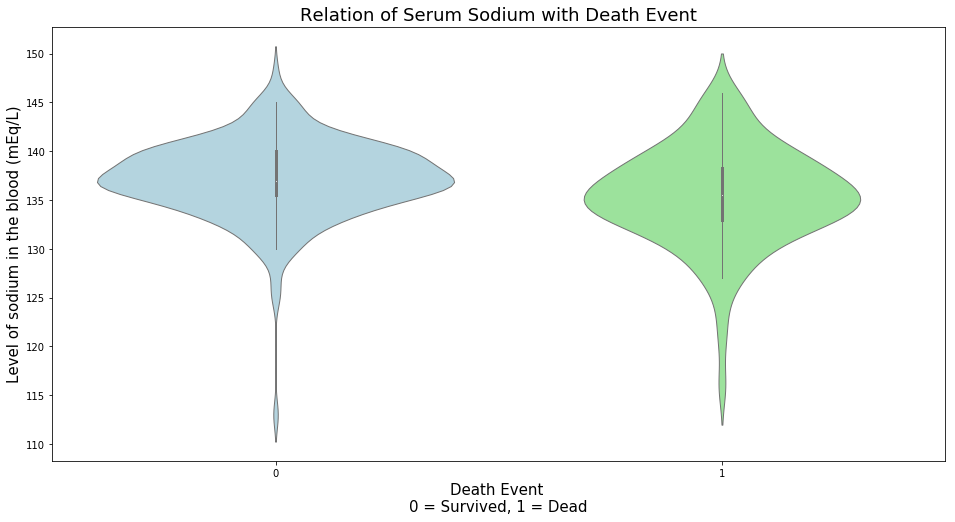

In [16]:
# full distribution of the serum sodium by death event
plt.figure(figsize=(16,8))
sns.violinplot(df_hf['DEATH_EVENT'], df_hf['serum_sodium'], palette = ['lightblue', 'lightgreen'], linewidth=1.0)
plt.title('Relation of Serum Sodium with Death Event', fontsize = 18)
plt.xlabel('Death Event \n0 = Survived, 1 = Dead', fontsize = 15)
plt.ylabel('Level of sodium in the blood (mEq/L)', fontsize = 15)
plt.show()

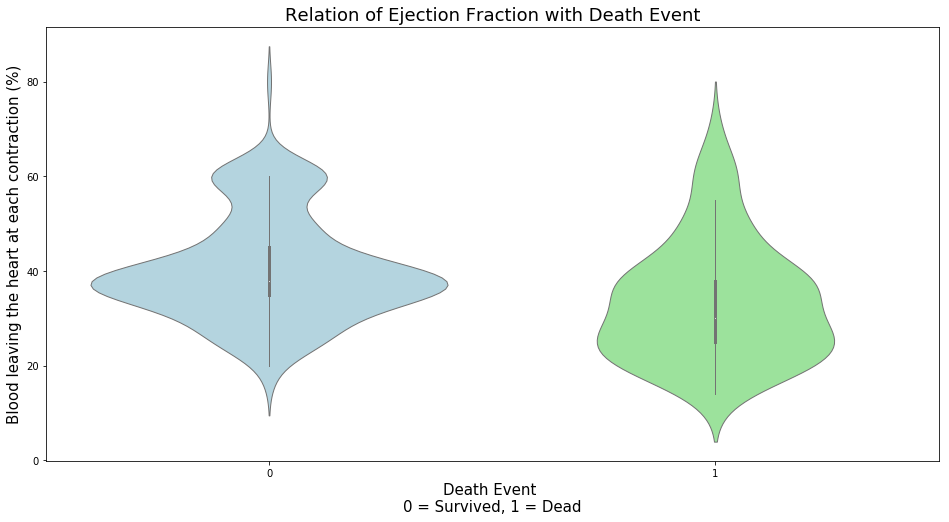

In [17]:
# full distribution of the ejection fraction by death event
plt.figure(figsize=(16,8))
sns.violinplot(df_hf['DEATH_EVENT'], df_hf['ejection_fraction'], palette = ['lightblue', 'lightgreen'], linewidth=1.0)
plt.title('Relation of Ejection Fraction with Death Event', fontsize = 18)
plt.xlabel('Death Event \n0 = Survived, 1 = Dead', fontsize = 15)
plt.ylabel('Blood leaving the heart at each contraction (%)', fontsize = 15)
plt.show()

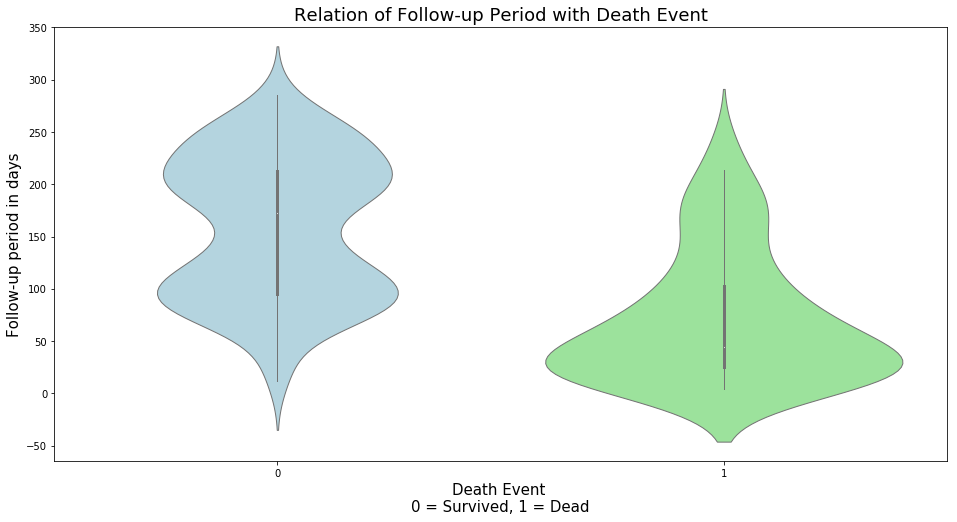

In [18]:
# full distribution of the time (follow-up period) by death event
plt.figure(figsize=(16,8))
sns.violinplot(df_hf['DEATH_EVENT'], df_hf['time'], palette = ['lightblue', 'lightgreen'], linewidth=1.0)
plt.title('Relation of Follow-up Period with Death Event', fontsize = 18)
plt.xlabel('Death Event \n0 = Survived, 1 = Dead', fontsize = 15)
plt.ylabel('Follow-up period in days', fontsize = 15)
plt.show()

Text(0, 0.5, 'Blood leaving the heart at each contraction (%)')

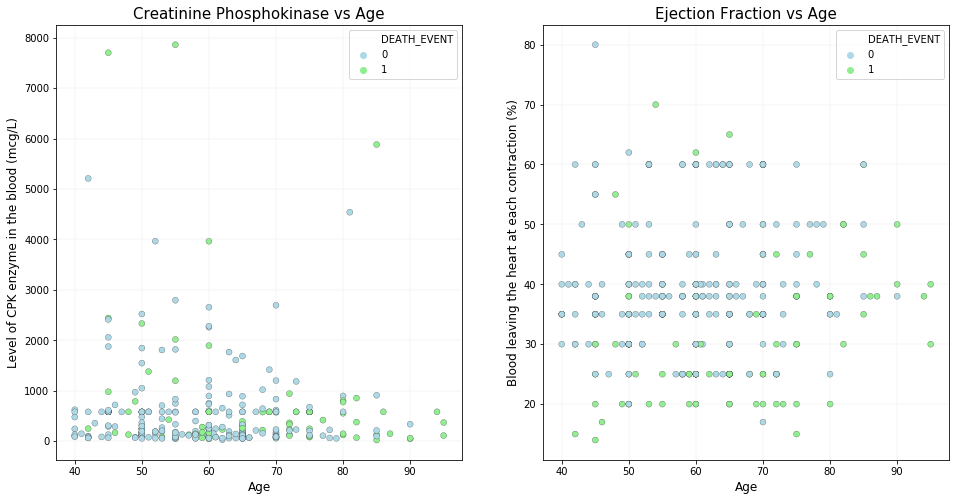

In [19]:
# dispersion of creatinine phosphokinase and ejection fraction by age by death event
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1 = sns.scatterplot(x = df_hf['age'], y = df_hf['creatinine_phosphokinase'], hue = "DEATH_EVENT", data = df_hf, ax=ax1, 
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax1.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax1.set_title('Creatinine Phosphokinase vs Age', fontsize=15)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Level of CPK enzyme in the blood (mcg/L)', fontsize=12)


ax2 = sns.scatterplot(x = df_hf['age'], y = df_hf['ejection_fraction'], hue = "DEATH_EVENT", data = df_hf,  ax=ax2, 
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax2.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax2.set_title('Ejection Fraction vs Age', fontsize=15)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Blood leaving the heart at each contraction (%)', fontsize=12)

Text(0, 0.5, 'Level of sodium in the blood (mEq/L)')

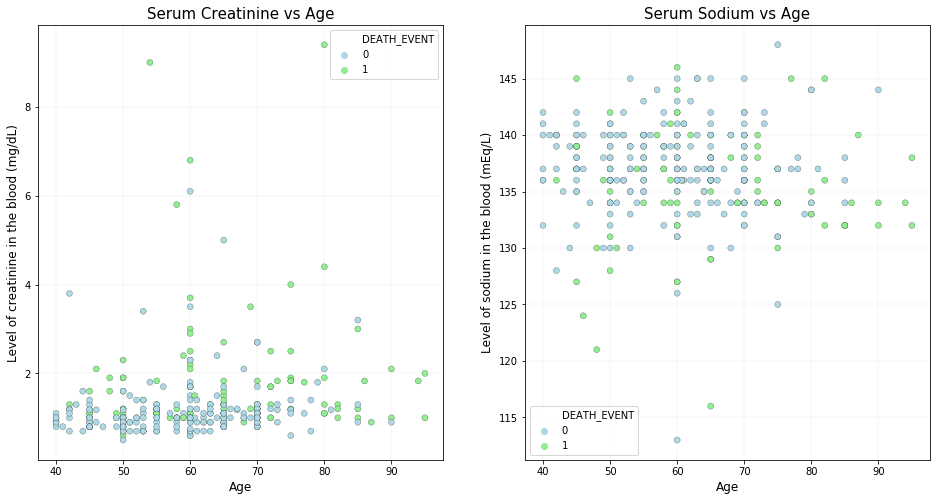

In [20]:
# dispersion of serum phosphokinase and serum sodium by age by death event
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1 = sns.scatterplot(x = df_hf['age'], y = df_hf['serum_creatinine'], hue = "DEATH_EVENT", data = df_hf, ax=ax1, 
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax1.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax1.set_title('Serum Creatinine vs Age', fontsize=15)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Level of creatinine in the blood (mg/dL)', fontsize=12)

ax2 = sns.scatterplot(x = df_hf['age'], y = df_hf['serum_sodium'], hue = "DEATH_EVENT", data = df_hf,  ax=ax2, 
                      palette=['lightblue', 'lightgreen'], alpha=1.0, edgecolor="black", linewidth=0.2)
ax2.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
ax2.set_title('Serum Sodium vs Age', fontsize=15)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Level of sodium in the blood (mEq/L)', fontsize=12)

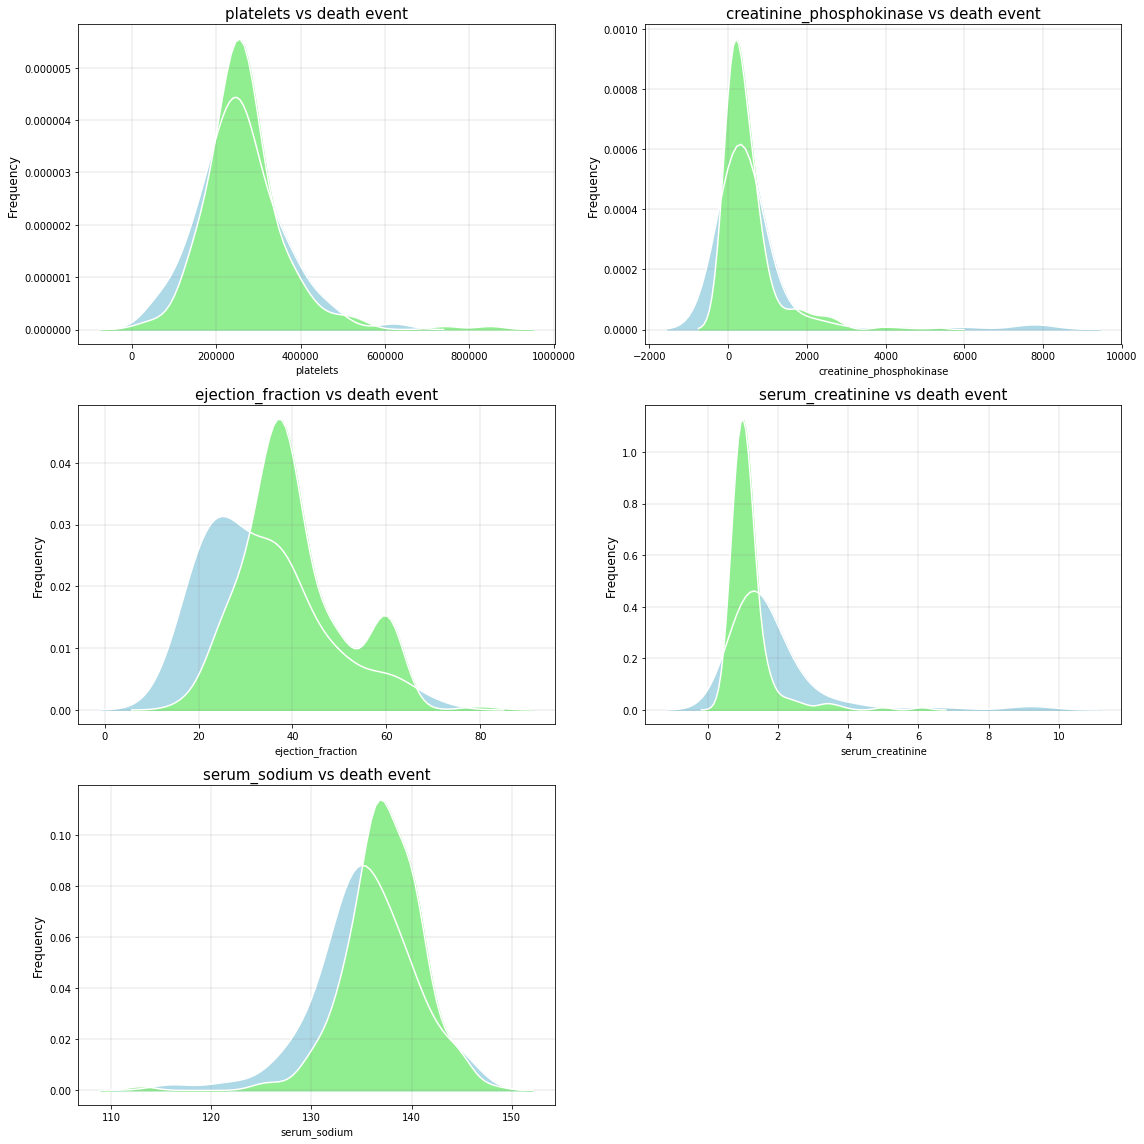

In [21]:
# frequency of continuos variables
f,ax = plt.subplots(3, 2, figsize=(16,16))
f.delaxes(ax[2,1])

for i,feature in enumerate(['platelets', 'creatinine_phosphokinase','ejection_fraction','serum_creatinine',
                            'serum_sodium']):
    sns.distplot(df_hf[df_hf['DEATH_EVENT']==0][(feature)], ax=ax[i//2,i%2], kde_kws={"color":"white"}, hist=False )
    sns.distplot(df_hf[df_hf['DEATH_EVENT']==1][(feature)], ax=ax[i//2,i%2], kde_kws={"color":"white"}, hist=False )

    l1 = ax[i//2,i%2].lines[0]
    l2 = ax[i//2,i%2].lines[1]

    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    x2 = l2.get_xydata()[:,0]
    y2 = l2.get_xydata()[:,1]

    ax[i//2,i%2].fill_between(x2, y2, color="lightblue", alpha=1)
    ax[i//2,i%2].fill_between(x1, y1, color="lightgreen", alpha=1)
    ax[i//2,i%2].grid(b=True, which='major', color='grey', linewidth=0.2)
    ax[i//2,i%2].set_title('{} vs death event'.format(feature), fontsize=15)
    ax[i//2,i%2].set_ylabel("Frequency", fontsize=12)
    
plt.tight_layout()
plt.show()

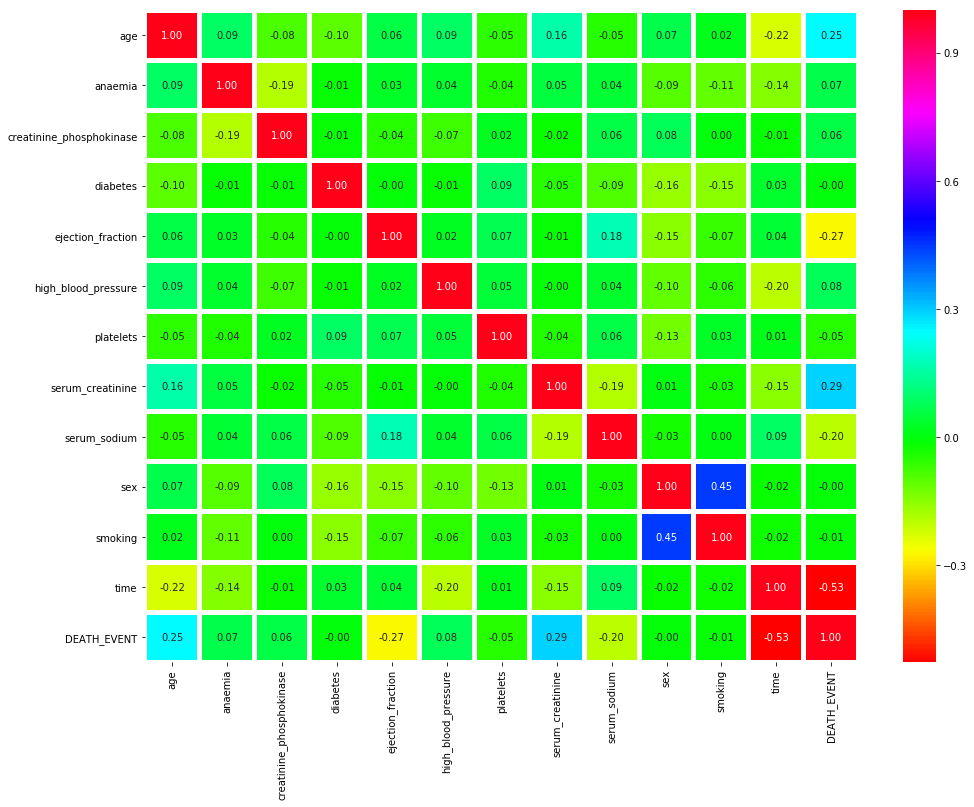

In [22]:
# correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(df_hf.corr(), annot=True, cmap='hsv', fmt='.2f', linewidths=4)
plt.show()

## 4. Splitting the Dataset

In [23]:
# split the dataset in 60/20/20 - training, validation and testing
from sklearn.model_selection import train_test_split

random_state = 175

# separate x and y
X = df_hf.drop('DEATH_EVENT', axis = 1)
y = df_hf['DEATH_EVENT'].copy()

# separate the training and testing datasets
# - training set: 70%
# - testing set : 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X test : ", X_test.shape)
print("y test : ", y_test.shape)

X train:  (209, 12)
y train:  (209,)
X test :  (90, 12)
y test :  (90,)


## 5. Processing using Deep Learning

In [24]:
# importing the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [25]:
tf.random.set_seed(175)

input_dim = X_train.shape[1]  # Number of features

optimizers = ['adam', 'adamax', 'nadam']

model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

for optimizer in optimizers:
    print("Optimizer        : ", optimizer)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, verbose=False, validation_data=(X_test, y_test), batch_size=25)

    loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
    print("Training Accuracy: {:.4f}" . format(accuracy))
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    print("Testing Accuracy : {:.4f}" . format(accuracy))

    print("-----------------------------------------")

Optimizer        :  adam
Training Accuracy: 0.6890
Testing Accuracy : 0.6667
-----------------------------------------
Optimizer        :  adamax
Training Accuracy: 0.7512
Testing Accuracy : 0.7667
-----------------------------------------
Optimizer        :  nadam
Training Accuracy: 0.6172
Testing Accuracy : 0.6667
-----------------------------------------


## 6. Processing Baseline Models

In [26]:
# load libraries
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [27]:
# general settings
scores = []

scoring = 'accuracy'
cv = 10
names = ['AdaBoost', 'Bagging', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression', 'Multi-layer Perceptron', 
         'Naive Bayes', 'Random Forest', 'Stochastic Gradient Descent', 'Extreme Gradient Boosting']

# define the parameters to be used in GridSearchCV
gs_params_ab = {'n_estimators': [10, 25, 50, 100], 'learning_rate': [0.5, 1, 2, 5], 'random_state': [random_state]}
gs_params_bag = {'n_estimators': [5, 10, 25, 50, 100], 'max_features': [0.5, 1, 2, 5], 'random_state': [random_state]}
gs_params_dt = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 5, 10], 
                'random_state': [random_state]}
gs_params_knn = {'n_neighbors': [3, 4, 5, 7, 10, 15, 20, 25], 'weights': ['uniform', 'distance']}
gs_params_lr = {'C': [1.0, 0.5, 0.1], 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [200], 
                'random_state': [random_state]}
gs_params_mlp = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['sgd', 'adam'], 'max_iter': [2000],
                'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive'], 'random_state': [random_state]}
gs_params_nve = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}
gs_params_rf = {'n_estimators': [1, 3, 5, 7, 10], 'criterion': ['entropy'], 'random_state': [random_state]}
gs_params_sgd = {'penalty': ['l1', 'l2'], 'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2], 'fit_intercept': [True, False], 
                 'random_state': [random_state]}
gs_params_xgb = {'gamma': [0, 1, 2, 3], 'max_depth': [3, 6, 10], 'lambda': [1, 2, 5], 'alpha': [0, 1, 2], 
                 'random_state': [random_state]}

# list all classifiers
classifiers = [
    GridSearchCV(estimator=AdaBoostClassifier(), param_grid=gs_params_ab, scoring=scoring, cv=cv),
    GridSearchCV(estimator=BaggingClassifier(), param_grid=gs_params_bag, scoring=scoring, cv=cv),
    GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=gs_params_dt, scoring=scoring, cv=cv),
    GridSearchCV(estimator=KNeighborsClassifier(), param_grid=gs_params_knn, scoring=scoring, cv=cv),
    GridSearchCV(estimator=LogisticRegression(), param_grid=gs_params_lr, scoring=scoring, cv=cv),
    GridSearchCV(estimator=MLPClassifier(), param_grid=gs_params_mlp, scoring=scoring, cv=cv),
    GridSearchCV(estimator=GaussianNB(), param_grid=gs_params_nve, scoring=scoring, cv=cv),
    GridSearchCV(estimator=RandomForestClassifier(), param_grid=gs_params_rf, scoring=scoring, cv=cv),
    GridSearchCV(estimator=SGDClassifier(), param_grid=gs_params_sgd, scoring=scoring, cv=cv),
    GridSearchCV(estimator=XGBClassifier(), param_grid=gs_params_xgb, scoring=scoring, cv=cv)]

In [28]:
# use pipeline to find the best classifier
from sklearn.metrics import accuracy_score

best_acc = 0.0
best_gs = ''

for classifier in classifiers:
    pipeline = Pipeline(steps=[('classifier', classifier)])
    pipeline.fit(X_train, y_train)

    scores.append(pipeline.score(X_test, y_test))
    y_pred = pipeline.predict(X_test)
    
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = classifier

    print(classifier)
    print('Best params: %s' % classifier.best_params_)
    print('Best training accuracy: %.3f' % classifier.best_score_)
    print("Model Score: %.3f" % pipeline.score(X_test, y_test))
    print("-----------------------------------------------------------------------------------\n")

#Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 2, 5],
                         'n_estimators': [10, 25, 50, 100],
                         'random_state': [175]},
             scoring='accuracy')
Best params: {'learning_rate': 2, 'n_estimators': 25, 'random_state': 175}
Best training accuracy: 0.819
Model Score: 0.889
-----------------------------------------------------------------------------------

GridSearchCV(cv=10, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.5, 1, 2, 5],
                         'n_estimators': [5, 10, 25, 50, 100],
                         'random_state': [175]},
             scoring='accuracy')
Best params: {'max_features': 0.5, 'n_estimators': 100, 'random_state': 175}
Best training accuracy: 0.785
Model Score: 0.833
-----------------------------------------------------------------------------------

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_

In [29]:
# ordering the scores to select the best model
scores_df.sort_values(by='Accuracy Score', ascending=False)

,Classifier,Accuracy Score
9,Extreme Gradient Boosting,0.922222
0,AdaBoost,0.888889
2,Decision Tree,0.888889
4,Logistic Regression,0.866667
7,Random Forest,0.855556
1,Bagging,0.833333
6,Naive Bayes,0.833333
5,Multi-layer Perceptron,0.666667
3,K-Nearest Neighbors,0.644444
8,Stochastic Gradient Descent,0.333333


## 7. Model Evaluation 

Analysing the results from Deep Learning and Baseline Models, the best model is **Extreme Gradient Boosting (XGBoost)**.

In [30]:
# importing the library
from sklearn.metrics import confusion_matrix, classification_report

# predicting the model
y_pred = best_gs.predict(X_test)

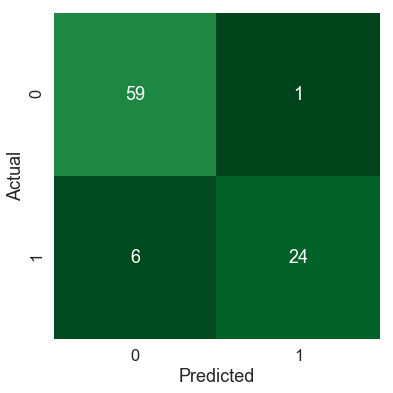

In [31]:
# creating the Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=np.unique(y_test), index=np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

plt.figure(figsize=(12, 6))
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot=True, annot_kws={'size': 18}, cbar=False, vmax=250, square=True, fmt='d', cmap='BuGn_r')

In [32]:
# creating the Classification Report
print("-----------------------------------------------------")
print("Classification Report - XGBoost\n")
print(classification_report(y_test, y_pred))

-----------------------------------------------------
Classification Report - XGBoost

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.96      0.80      0.87        30

    accuracy                           0.92        90
   macro avg       0.93      0.89      0.91        90
weighted avg       0.93      0.92      0.92        90



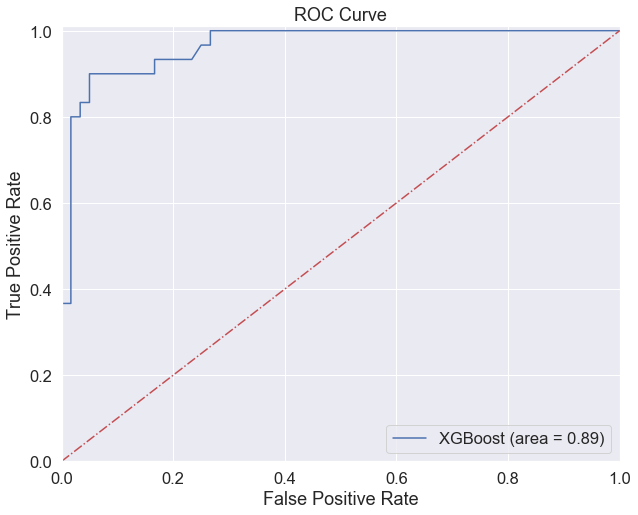

In [33]:
# creating the ROC Curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, best_gs.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1],'r-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('HeartFailure - XGBoost')
plt.show()

## 8. Feature Importance

In [34]:
# use feature importance for feature selection
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

# fit model
model = XGBClassifier(reg_alpha=2, gamma=3, reg_lambda=2, max_depth=6, random_state=175)
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 92.22%
Thresh=0.000, n=12, Accuracy: 90.00%
Thresh=0.000, n=12, Accuracy: 90.00%
Thresh=0.000, n=12, Accuracy: 90.00%
Thresh=0.000, n=12, Accuracy: 90.00%
Thresh=0.000, n=12, Accuracy: 90.00%
Thresh=0.000, n=12, Accuracy: 90.00%
Thresh=0.000, n=12, Accuracy: 90.00%
Thresh=0.098, n=5, Accuracy: 86.67%
Thresh=0.099, n=4, Accuracy: 85.56%
Thresh=0.138, n=3, Accuracy: 83.33%
Thresh=0.140, n=2, Accuracy: 87.78%
Thresh=0.526, n=1, Accuracy: 83.33%


In [35]:
importance = pd.DataFrame(model.feature_importances_, 
             columns=['Importance'], 
             index=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 
                    'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
            ).sort_values(ascending=False, by='Importance')

importance.reset_index(level=0, inplace=True)
importance.columns = ['Feature', 'Importance']
importance

,Feature,Importance
0,time,0.525813
1,ejection_fraction,0.139681
2,serum_creatinine,0.137549
3,age,0.099164
4,serum_sodium,0.097794
5,anaemia,0.000000
6,creatinine_phosphokinase,0.000000
7,diabetes,0.000000
8,high_blood_pressure,0.000000
9,platelets,0.000000


## 9. Out of Sample

In [36]:
# list of new patients with its medical records
# the variables are: 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 
#                    'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'
new_patients = [[59, 1, 80, 0, 30, 1, 427000, 1, 438, 0, 0, 35],
                [48, 1, 52, 0, 325, 1, 276000, 1.3, 137, 0, 0, 95],
                [83, 0, 63, 1, 60, 0, 368000, 0.8, 135, 1, 0, 32],
                [80, 1, 159, 1, 30, 0, 302000, 1.2, 138, 0, 0, 49],
                [50, 1, 2334, 1, 35, 0, 75000, 0.9, 142, 0, 0, 156],
                [48, 0, 2442, 1, 30, 0, 334000, 1.1, 139, 1, 0, 89],
                [60, 0, 776, 0, 68, 1, 192000, 1.3, 135, 0, 0, 80],
                [65, 0, 66, 1, 20, 0, 70000, 2.4, 134, 1, 0, 105]]

# dataframe with new patients
pd_new_patients = pd.DataFrame(new_patients, 
                               columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 
                                        'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 
                                        'smoking', 'time'])

# prediction using the best model (XGBoost)
results_new_patients = best_gs.predict(pd_new_patients)

for i in range(results_new_patients.shape[0]):
    if results_new_patients[i] == 0:
        print("The prediction for patient #%d is Survive" % (i+1))
    else:
        print("The prediction for patient #%d is Dead" % (i+1)) 

The prediction for patient #1 is Dead
The prediction for patient #2 is Survive
The prediction for patient #3 is Dead
The prediction for patient #4 is Dead
The prediction for patient #5 is Survive
The prediction for patient #6 is Survive
The prediction for patient #7 is Survive
The prediction for patient #8 is Dead


## 10. Conclusion

As 'time' is obvious (greater the time, greater chance of survive), we can affirm that, in general, the model has an accuracy about 92% and the most important features are 'ejection fraction', 'serum creatinine', 'age', and 'serum sodium'.

It is possible to observe that the precision and recall is more similar each other for the class '0' (survived) because we have a umbalanced dataset, where there about 2 times more class '0' than '1' (dead).